In [7]:
!pip install scikit-learn pandas numpy matplotlib boto3

  Using cached jmespath-1.0.1-py3-none-any.whl.metadata (7.6 kB)
  Using cached s3transfer-0.14.0-py3-none-any.whl.metadata (1.7 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
   ---------------------------------------- 0.0/14.1 MB ? eta -:--:--
   ------ --------------------------------- 2.4/14.1 MB 20.5 MB/s eta 0:00:01
   ------------- -------------------------- 4.7/14.1 MB 11.4 MB/s eta 0:00:01
   ------------------------- -------------- 9.2/14.1 MB 14.6 MB/s eta 0:00:01
   ------------------------------------ --- 12.8/14.1 MB 15.5 MB/s eta 0:00:01
   ---------------------------------------- 14.1/14.1 MB 14.9 MB/s  0:00:00
Using cached jmespath-1.0.1-py3-none-any.whl (20 kB)
Using cached s3transfer-0.14.0-py3-none-any.whl (85 kB)
Using cached urllib3-2.5.0-py3-none-any.whl (129 kB)

   ---------------------------------------- 0/5 [urllib3]
   -------- ------------------------------- 1/5 [jmespath]
   ---------------- ----------------------- 2/5 [botocore]
   --

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os

# --- Configuration ---
# Set your file paths and split ratio here

# 1. DEFINE YOUR INPUT FILE PATH
# Update this to the path of your CSV file
input_csv_path = 'cars.csv' 

# 2. DEFINE YOUR OUTPUT FILE PATHS
train_csv_path = 'train.csv'
test_csv_path = 'test.csv'

# 3. DEFINE SPLIT RATIO
test_split_size = 0.2  # 20% for test, 80% for train

# 4. SET RANDOM STATE
# This ensures your split is reproducible. 
# You can use any number.
random_seed = 42

# --- Script Logic ---
# This will run directly when you execute the cell

try:
    # Check if the input file exists
    if not os.path.exists(input_csv_path):
        print(f"Error: Input file not found at '{input_csv_path}'")
        print("Please update 'input_csv_path' to point to your file.")
        # Create a dummy file for demonstration if it doesn't exist
        print("Creating a dummy 'your_data.csv' for demonstration purposes.")
        dummy_data = {
            'feature1': range(100),
            'feature2': [x * 2 for x in range(100)],
            'target': [0 if x % 2 == 0 else 1 for x in range(100)]
        }
        pd.DataFrame(dummy_data).to_csv(input_csv_path, index=False)
        print(f"Dummy file created. Please re-run the cell.")

    else:
        # Read the entire dataset from the CSV file
        print(f"Reading data from '{input_csv_path}'...")
        original_data = pd.read_csv(input_csv_path)
        print(f"Successfully read {len(original_data)} rows.")

        # Perform the 80/20 split
        # test_size=0.2 means 20% for test, 80% for train
        # random_state ensures we get the same split every time we run the script
        print(f"Splitting data ({int((1-test_split_size)*100)}% train / {int(test_split_size*100)}% test)...")
        train_df, test_df = train_test_split(
            original_data, 
            test_size=test_split_size, 
            random_state=random_seed
        )

        # Save the training data
        # index=False prevents pandas from writing the dataframe index as a column
        print(f"Saving training data to '{train_csv_path}'...")
        train_df.to_csv(train_csv_path, index=False)
        print(f"Saved {len(train_df)} rows to {train_csv_path}")

        # Save the testing data
        print(f"Saving testing data to '{test_csv_path}'...")
        test_df.to_csv(test_csv_path, index=False)
        print(f"Saved {len(test_df)} rows to {test_csv_path}")
        
        print("\nSplit complete!")

except FileNotFoundError:
    print(f"Error: The file '{input_csv_path}' was not found.")
except pd.errors.EmptyDataError:
    print(f"Error: The file '{input_csv_path}' is empty.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Reading data from 'cars.csv'...
Successfully read 46582 rows.
Splitting data (80% train / 20% test)...
Saving training data to 'train.csv'...
Saved 37265 rows to train.csv
Saving testing data to 'test.csv'...
Saved 9317 rows to test.csv

Split complete!


In [9]:
%pip install seaborn
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt  # Add this line
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

import boto3




Note: you may need to restart the kernel to use updated packages.


In [10]:
# Python version
print(sys.version)

3.13.7 (tags/v3.13.7:bcee1c3, Aug 14 2025, 14:15:11) [MSC v.1944 64 bit (AMD64)]


In [11]:
# current path
print(sys.executable)

c:\projects\aws15\.venv\Scripts\python.exe


In [12]:
s3_bucket = "aws15-data"
def upload_to_s3(localpath, remotepath):
    boto3.client("s3").upload_file(Filename=localpath, Bucket=s3_bucket, Key=remotepath)

def download_from_s3(localpath, remotepath):
    boto3.client("s3").download_file(s3_bucket, remotepath, localpath)    

In [13]:
# download_from_s3("train.csv","train.csv")

In [14]:
# download_from_s3("test.csv","test.csv")

In [20]:
data = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')  #To be used at the end of the project

In [21]:
data

,ad_id,price,subject,brand,model,model_family,model_year,mileage,fuel,gearbox,horsepower,color,drive_wheels,body_type,first_traffic_date,equipment_count,advertiser_type,region,municipality
0,1001530886,686250.0,"Mercedes-Benz Vito 116 CDI 4x4 3.0t ,163hk *la...",Mercedes-Benz,Vito,V-klass,2025.0,NaN,Diesel,Automat,163.0,Vit,Fyrhjulsdriven,Yrkesfordon,2024-12-16,48,store,Kronoberg,Växjö
1,1002732946,424800.0,"Volkswagen Transporter T7 110HK Drag,Backkamer...",Volkswagen,Transporter,Transporter/Caravelle,2025.0,0,Diesel,Manuell,110.0,Vit (Clear White),Tvåhjulsdriven,Yrkesfordon,NaN,9,store,Östergötland,Motala
2,1402277554,70000.0,Volvo Amazon 121 1964,Volvo,Amazon,Amazon,1964.0,0,Bensin,Manuell,68.0,Svart,Tvåhjulsdriven,Sedan,1963-09-30,1,private,Göteborg,Munkedal
3,1002630678,339800.0,Renault Mégane R.S 300hk Recarostolar BOSE Kam...,Renault,Mégane,Mégane,2020.0,6 142,Bensin,Automat,300.0,Svart,Tvåhjulsdriven,Halvkombi,2020-03-27,20,store,Örebro,Örebro
4,1003086380,587375.0,"KGM Musso EV AWD 80,6kwh inkl vagnskadegaranti",KGM,Musso,NaN,2026.0,NaN,El,Automat,237.0,NaN,NaN,Yrkesfordon,NaN,9,store,Uppsala,Uppsala
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37260,1002466710,473331.0,Kia EV3 Long Range PRIVATLEASING 4495kr/mån,Kia,EV3,EV3,2025.0,0,El,Automat,204.0,NaN,NaN,Halvkombi,NaN,23,store,Stockholm,Täby
37261,1402437534,125000.0,"Kia Optima 1.7 CRDi Executive, GLS Euro 5",Kia,Optima,Optima,2014.0,15 400,Diesel,Automat,136.0,Vit,Tvåhjulsdriven,Sedan,2014-05-05,61,private,Värmland,Arvika
37262,109645040,597200.0,Mazda CX-60 2.5 PHEV 327HK AWD HOMURA,Mazda,CX-60,CX-60,2025.0,NaN,Miljöbränsle/Hybrid,Automat,326.0,NaN,NaN,SUV,NaN,59,store,Stockholm,Stockholms stad
37263,1000881881,819900.0,Kia EV9 GT Line AWD 6-sits Business Edition,Kia,EV9,EV9,2025.0,0,El,Automat,385.0,NaN,NaN,SUV,NaN,18,store,Uppsala,Uppsala


In [22]:
data_test

,ad_id,price,subject,brand,model,model_family,model_year,mileage,fuel,gearbox,horsepower,color,drive_wheels,body_type,first_traffic_date,equipment_count,advertiser_type,region,municipality
0,1002937777,1006850.0,Volvo EX90 Twin Motor Ultra 7-sätes - Demobil,Volvo,EX90,EX90,2025.0,1 500,El,Automat,413.0,Vit,Fyrhjulsdriven,SUV,2025-08-20,10,store,Uppsala,Uppsala
1,1002991606,663900.0,BMW iX2 xDrive 30,BMW,iX2,Övriga,2026.0,0,El,Automat,313.0,Grå (M Brooklyn Grey Metallic),Fyrhjulsdriven,Sedan,NaN,17,store,Stockholm,Danderyd
2,1002697405,519900.0,Kia EV3 GT-Line Long Range,Kia,EV3,EV3,2025.0,1,El,Automat,204.0,Svart (Aurora Black Pearl),Tvåhjulsdriven,SUV,2025-09-03,62,store,Stockholm,Upplands Väsby
3,1002772472,1186300.0,Porsche Macan 4,Porsche,Macan,Macan,2025.0,0,El,Automat,387.0,Svart (Black),Fyrhjulsdriven,Kombi,NaN,25,store,Göteborg,Mölndal
4,1002994687,4295.0,Volvo EX30 TWIN MOTOR PLUS |*PRIVATLEASINGKAM...,Volvo,EX30,EX30,2026.0,NaN,El,Automat,428.0,NaN,NaN,SUV,NaN,0,store,Stockholm,Solna
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9312,1001574173,399900.0,Peugeot e-Expert Pro+ L2 75 Kwh,Peugeot,e-Expert,E-expert,2023.0,1 700,El,Automat,136.0,Grå (Grå Platinum),Tvåhjulsdriven,Yrkesfordon,2023-06-26,23,store,Östergötland,Linköping
9313,1003025021,69900.0,BMW X3 xDrive20d Comfort M Sport 177hk,BMW,X3,X-serien,2010.0,27 349,Diesel,Automat,177.0,Vit,Fyrhjulsdriven,SUV,2009-08-28,32,store,Skåne,Vellinge
9314,1002967639,969000.0,Porsche Macan Macan 4,Porsche,Macan,Macan,2025.0,350,El,Automat,393.0,Grå,Fyrhjulsdriven,SUV,2025-05-30,22,store,Skåne,Malmö stad
9315,1002228522,149900.0,Volkswagen Golf Sportsvan 1.6 TDI DPF SCR/Car-...,Volkswagen,Golf,Golf,2019.0,16 935,Diesel,Automat,116.0,Röd,Tvåhjulsdriven,Halvkombi,2019-09-25,42,store,Skåne,Kristianstad


In [ ]:
print("Number of empty data in the Train data set")
print(data.isna().sum())
print("-------------------------------------------")
print("Number of empty data in the Test data set")
print(data_test.isna().sum())

Number of empty data in the Train data set
ad_id                     0
price                    21
subject                  16
brand                    37
model                   120
model_family            655
model_year               17
mileage                3492
fuel                    223
gearbox                 263
horsepower             2400
color                  7981
drive_wheels           7835
body_type               474
first_traffic_date    10784
equipment_count           0
advertiser_type          16
region                    0
municipality            824
dtype: int64
-------------------------------------------
Number of empty data in the Test data set
ad_id                    0
price                    6
subject                  6
brand                   12
model                   42
model_family           133
model_year               6
mileage                937
fuel                    60
gearbox                 70
horsepower             593
color                 2025
dr

In [23]:
data['mileage'] = data['mileage'].astype(str).str.replace(r'\s+', '', regex=True)
            
# Convert to numeric, turning any errors (like 'NaN' strings or empty strings) into NaN
data['mileage'] = pd.to_numeric(data['mileage'], errors='coerce')

# Fill any NaN values with 0 before converting to integer
data['mileage'] = data['mileage'].fillna(0)

# Convert the column to integer
data['mileage'] = data['mileage'].astype(int)

print("Finished cleaning 'mileage' column. Here's a sample:")
print(data['mileage'].head())

Finished cleaning 'mileage' column. Here's a sample:
0       0
1       0
2       0
3    6142
4       0
Name: mileage, dtype: int64


In [ ]:
data

,ad_id,price,subject,brand,model,model_family,model_year,mileage,fuel,gearbox,horsepower,color,drive_wheels,body_type,first_traffic_date,equipment_count,advertiser_type,region,municipality
0,1002223257,5495.0,Volkswagen ID.4 Pro Edition 77 kWh 286hk |Priv...,Volkswagen,ID.4,ID.4,2025.0,0,El,Automat,286.0,NaN,NaN,SUV,NaN,38,store,Halland,Falkenberg
1,1002556490,659900.0,Volkswagen Transporter Nya 4M I 150hk Auto I L...,Volkswagen,Transporter,Transporter/Caravelle,2025.0,0,Diesel,Automat,151.0,Vit,Fyrhjulsdriven,Yrkesfordon,2025-04-29,22,store,Jönköping,Jönköping
2,1002954568,479000.0,"Ford Kuga Plug-In Hybrid ST-Line X 2.5 243hk, ...",Ford,Kuga,Kuga,2026.0,0,Miljöbränsle/Hybrid,Automat,246.0,Grå,Tvåhjulsdriven,SUV,2025-09-19,28,store,Dalarna,Falun
3,1003143371,289900.0,BMW X1 xDrive20d 190hk Sport line HiFi Drag Ka...,BMW,X1,X-serien,2020.0,9753,Diesel,Automat,190.0,Grå,Fyrhjulsdriven,SUV,2020-07-24,28,store,Östergötland,Linköping
4,1003107791,274700.0,Volvo V60 RECHARGE T8 AWD 392HK R-DESIGN B&W® ...,Volvo,V60,V60,2019.0,18668,Miljöbränsle/Hybrid,Automat,392.0,Röd,Fyrhjulsdriven,Kombi,2018-12-11,109,store,Stockholm,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26927,1002977458,174600.0,Ford Galaxy TDCi AWD Business 7-sits PANO LÄDE...,Ford,Galaxy,Galaxy,2017.0,19993,Diesel,Automat,179.0,Vit,Fyrhjulsdriven,Familjebuss,2016-12-29,36,store,Stockholm,Upplands Väsby
26928,1002227185,109000.0,"Citroën Berlingo 1,6 BlueHDi ETG6 L2",Citroën,Berlingo,Berlingo,2017.0,12880,Diesel,Automat,99.0,Svart,Tvåhjulsdriven,Yrkesfordon,2018-06-27,8,store,Värmland,Arvika
26929,1002671709,469702.0,Toyota Hilux 150HK Automat Drag FjärrstyrdVärm...,Toyota,Hilux,Hilux,2019.0,5623,Diesel,Automat,150.0,Silver,Fyrhjulsdriven,Yrkesfordon,2019-10-31,34,store,Stockholm,Sigtuna
26930,1001078623,819375.0,Iveco Daily 35S16HA8(Aut) Skåp/Lyft/Öppningsba...,Iveco,Daily,Daily,2024.0,0,Diesel,Automat,160.0,Vit,Tvåhjulsdriven,Yrkesfordon,2024-07-05,2,store,Östergötland,Norrköping


In [34]:

# label_encoder = LabelEncoder()
# data["color"] = label_encoder.fit_transform(data["color"])

# label_encoder = LabelEncoder()
# data["model"] = label_encoder.fit_transform(data["model"])

# label_encoder = LabelEncoder()
# data["brand"] = label_encoder.fit_transform(data["brand"])


#data = data.drop(columns=['model_family','subject','model_family','fuel','gearbox','drive_wheels','body_type','first_traffic_date','equipment_count','advertiser_type','region','municipality','ad_id'])
data = data.drop(columns=['ad_id'])


In [35]:
data

,price,brand,model,model_year,mileage,horsepower,color
0,686250.0,89,1554,2025.0,0,163.0,1481
1,424800.0,142,1495,2025.0,0,110.0,1539
2,70000.0,143,283,1964.0,0,68.0,1253
3,339800.0,115,1071,2020.0,6142,300.0,1253
4,587375.0,66,1064,2026.0,0,237.0,1701
...,...,...,...,...,...,...,...
37260,473331.0,67,690,2025.0,0,204.0,1701
37261,125000.0,67,1111,2014.0,15400,136.0,1481
37262,597200.0,87,429,2025.0,0,326.0,1701
37263,819900.0,67,694,2025.0,0,385.0,1701


In [36]:
correlation_matrix = data.corr()
print(correlation_matrix)

               price     brand     model  model_year   mileage  horsepower  \
price       1.000000 -0.067470  0.013852    0.069499 -0.094350    0.250005   
brand      -0.067470  1.000000  0.193855   -0.040181  0.086405   -0.138216   
model       0.013852  0.193855  1.000000    0.078326  0.015580    0.031536   
model_year  0.069499 -0.040181  0.078326    1.000000 -0.290095    0.250673   
mileage    -0.094350  0.086405  0.015580   -0.290095  1.000000   -0.153820   
horsepower  0.250005 -0.138216  0.031536    0.250673 -0.153820    1.000000   
color       0.030226 -0.023649  0.019894    0.257540 -0.159842    0.051655   

               color  
price       0.030226  
brand      -0.023649  
model       0.019894  
model_year  0.257540  
mileage    -0.159842  
horsepower  0.051655  
color       1.000000  


In [37]:
print(correlation_matrix['price'].sort_values(ascending=False))

price         1.000000
horsepower    0.250005
model_year    0.069499
color         0.030226
model         0.013852
brand        -0.067470
mileage      -0.094350
Name: price, dtype: float64


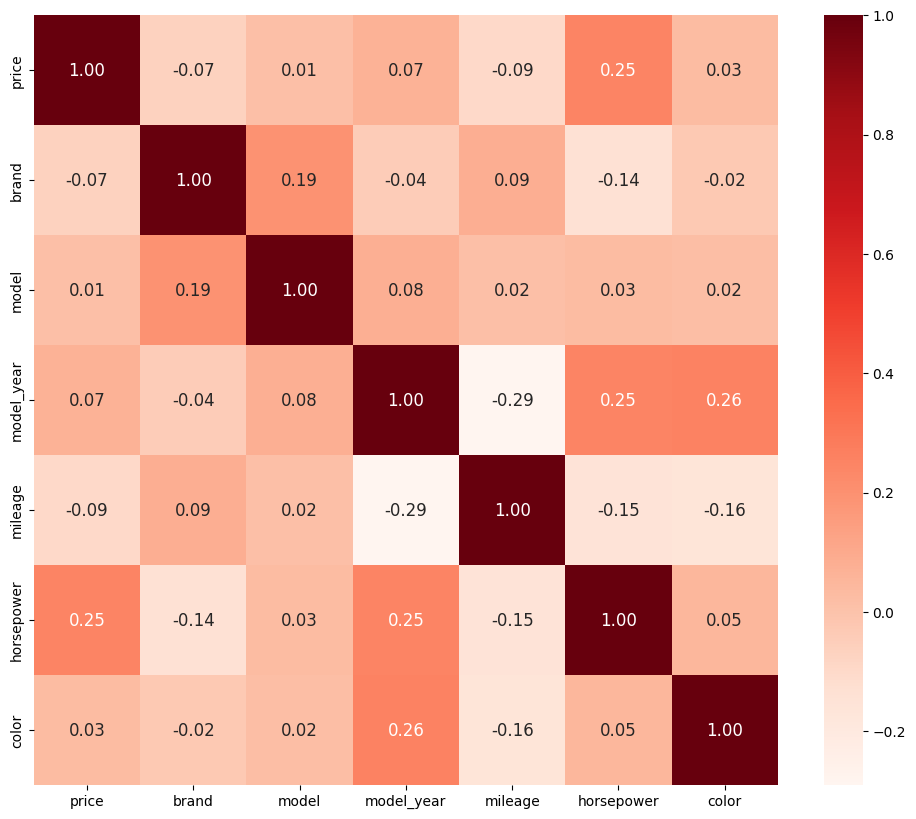

In [38]:
plt.figure(figsize=(12, 10))

# Draw the heatmap with larger annotation font size
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", annot_kws={"size": 12}, cmap=plt.cm.Reds)

# Show the plot
plt.show()

In [ ]:
# Drop the columns that we won't use


In [39]:
data

,price,brand,model,model_year,mileage,horsepower,color
0,686250.0,89,1554,2025.0,0,163.0,1481
1,424800.0,142,1495,2025.0,0,110.0,1539
2,70000.0,143,283,1964.0,0,68.0,1253
3,339800.0,115,1071,2020.0,6142,300.0,1253
4,587375.0,66,1064,2026.0,0,237.0,1701
...,...,...,...,...,...,...,...
37260,473331.0,67,690,2025.0,0,204.0,1701
37261,125000.0,67,1111,2014.0,15400,136.0,1481
37262,597200.0,87,429,2025.0,0,326.0,1701
37263,819900.0,67,694,2025.0,0,385.0,1701


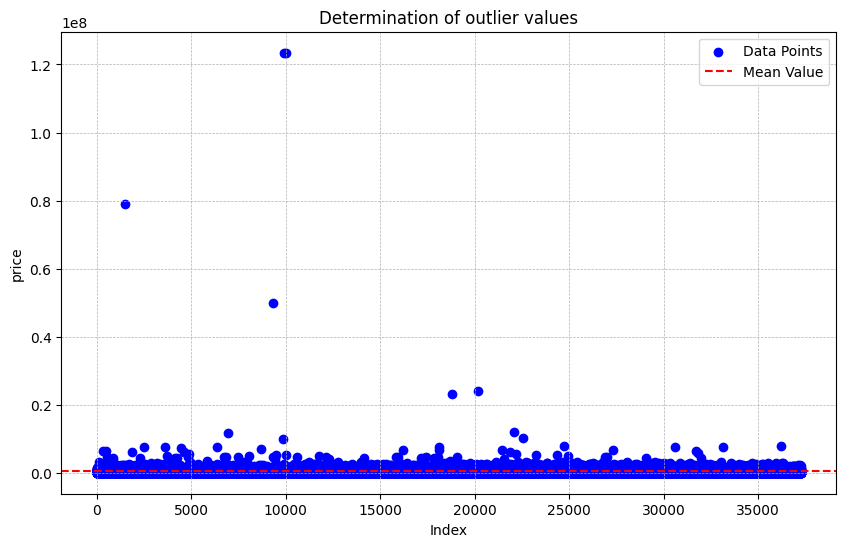

In [40]:
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(data.index, data["price"], color='blue', label='Data Points')

# Mean line
plt.axhline(y=data["price"].mean(), color='red', linestyle='--', label='Mean Value')

# Titles and labels
plt.title("Determination of outlier values")
plt.xlabel("Index")
plt.ylabel("price")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Legend
plt.legend()

# Show the plot
plt.show()

In [41]:
# Calculate the Interquartile Range (IQR):
x = int((data['price'].quantile(0.75)-data['price'].quantile(0.25))*1.5)

alt =data['price'].quantile(0.25)-x
ust =data['price'].quantile(0.75)+x

print("Values less than", alt , "will be considered Outlier")
print("Values more than", ust , "will be considered Outlier")

mean = int(data.query(f'price >{alt} & price < {ust}')['price'].mean())
data.loc[data["price"]<alt,"price"] = mean
data.loc[data["price"]>ust,"price"] = mean

Values less than -771775.0 will be considered Outlier
Values more than 1371625.0 will be considered Outlier


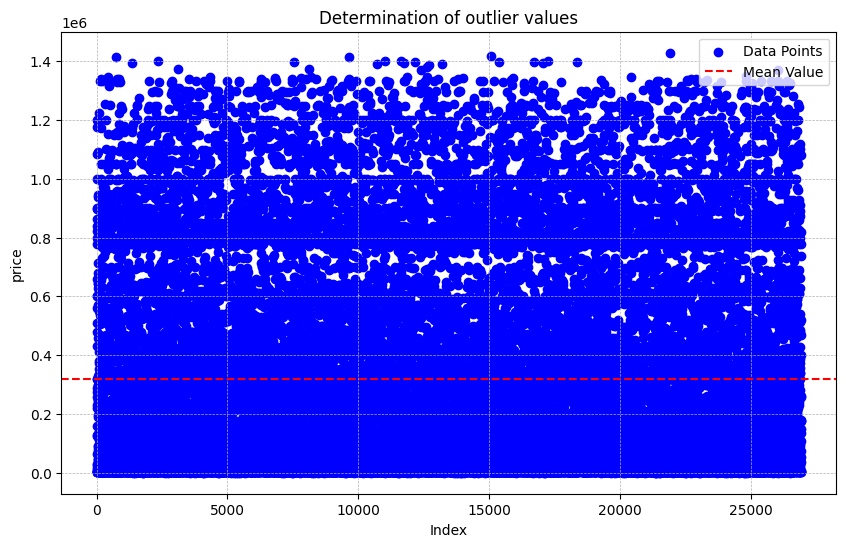

In [ ]:
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(data.index, data["price"], color='blue', label='Data Points')

# Mean line
plt.axhline(y=data["price"].mean(), color='red', linestyle='--', label='Mean Value')

# Titles and labels
plt.title("Determination of outlier values")
plt.xlabel("Index")
plt.ylabel("price")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Legend
plt.legend()

# Show the plot
plt.show()

In [42]:
data

,price,brand,model,model_year,mileage,horsepower,color
0,686250.0,89,1554,2025.0,0,163.0,1481
1,424800.0,142,1495,2025.0,0,110.0,1539
2,70000.0,143,283,1964.0,0,68.0,1253
3,339800.0,115,1071,2020.0,6142,300.0,1253
4,587375.0,66,1064,2026.0,0,237.0,1701
...,...,...,...,...,...,...,...
37260,473331.0,67,690,2025.0,0,204.0,1701
37261,125000.0,67,1111,2014.0,15400,136.0,1481
37262,597200.0,87,429,2025.0,0,326.0,1701
37263,819900.0,67,694,2025.0,0,385.0,1701


In [43]:
data['price']

0        686250.0
1        424800.0
2         70000.0
3        339800.0
4        587375.0
           ...   
37260    473331.0
37261    125000.0
37262    597200.0
37263    819900.0
37264    314800.0
Name: price, Length: 37265, dtype: float64

In [44]:
#80 % train-test split
split = int(0.8*data.shape[0])  #row,colon
train_data = data[:split]
test_data = data[split:]
test_data = test_data.reset_index(drop=True)

In [45]:
train_data.shape, test_data.shape

((29812, 7), (7453, 7))

In [46]:
data.columns

Index(['price', 'brand', 'model', 'model_year', 'mileage', 'horsepower',
       'color'],
      dtype='object')

In [47]:
input_cols =['brand', 'model', 'model_year', 'mileage', 'horsepower', 'color']

In [48]:
output_cols = ['price']

In [53]:
data.isnull().sum()

price         0
brand         0
model         0
model_year    0
mileage       0
horsepower    0
color         0
dtype: int64

In [52]:
data = data.fillna({
    'price': data['price'].median(),
    'model_year': data['model_year'].median(),
    'horsepower': data['horsepower'].median()
})

In [57]:
data.isnull().sum()

price         0
brand         0
model         0
model_year    0
mileage       0
horsepower    0
color         0
dtype: int64

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
X_train = train_data[input_cols].fillna(0).values
y_train = train_data[output_cols].fillna(0).astype('int').values

X_test = test_data[input_cols].fillna(0).values
y_test = test_data[output_cols].fillna(0).astype('int').values

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [64]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [67]:
y_pred

array([[243772.48909448],
       [311557.68255324],
       [191796.20179278],
       ...,
       [419499.74175793],
       [500429.7438836 ],
       [326091.81137346]], shape=(7453, 1))

In [71]:
#Required codes to convert "y_pred" values to "Fiyat" format
y_pred = np.round(y_pred/2500) * 2500
y_pred = y_pred.astype(int)

print(y_pred)

[[245000]
 [312500]
 [192500]
 ...
 [420000]
 [500000]
 [325000]]


In [73]:
count = 0
for i in y_pred:
    if i in y_test: 
        count += 1

print("Total:", count)

Total: 3659


In [75]:
#Calculate R2 Score

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print('R2 score: ', r2)

R2 score:  0.29016213612809816


In [76]:
%pip install joblib
import joblib

Note: you may need to restart the kernel to use updated packages.


In [77]:
joblib.dump(model,'./model.pkl')

['./model.pkl']

In [78]:
upload_to_s3('model.pkl','model_car.pkl')